# Part 1. Data Processing:

## Dataset info

#### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 

#### The classification goal is to predict if the client will subscribe a term deposit (variable y).

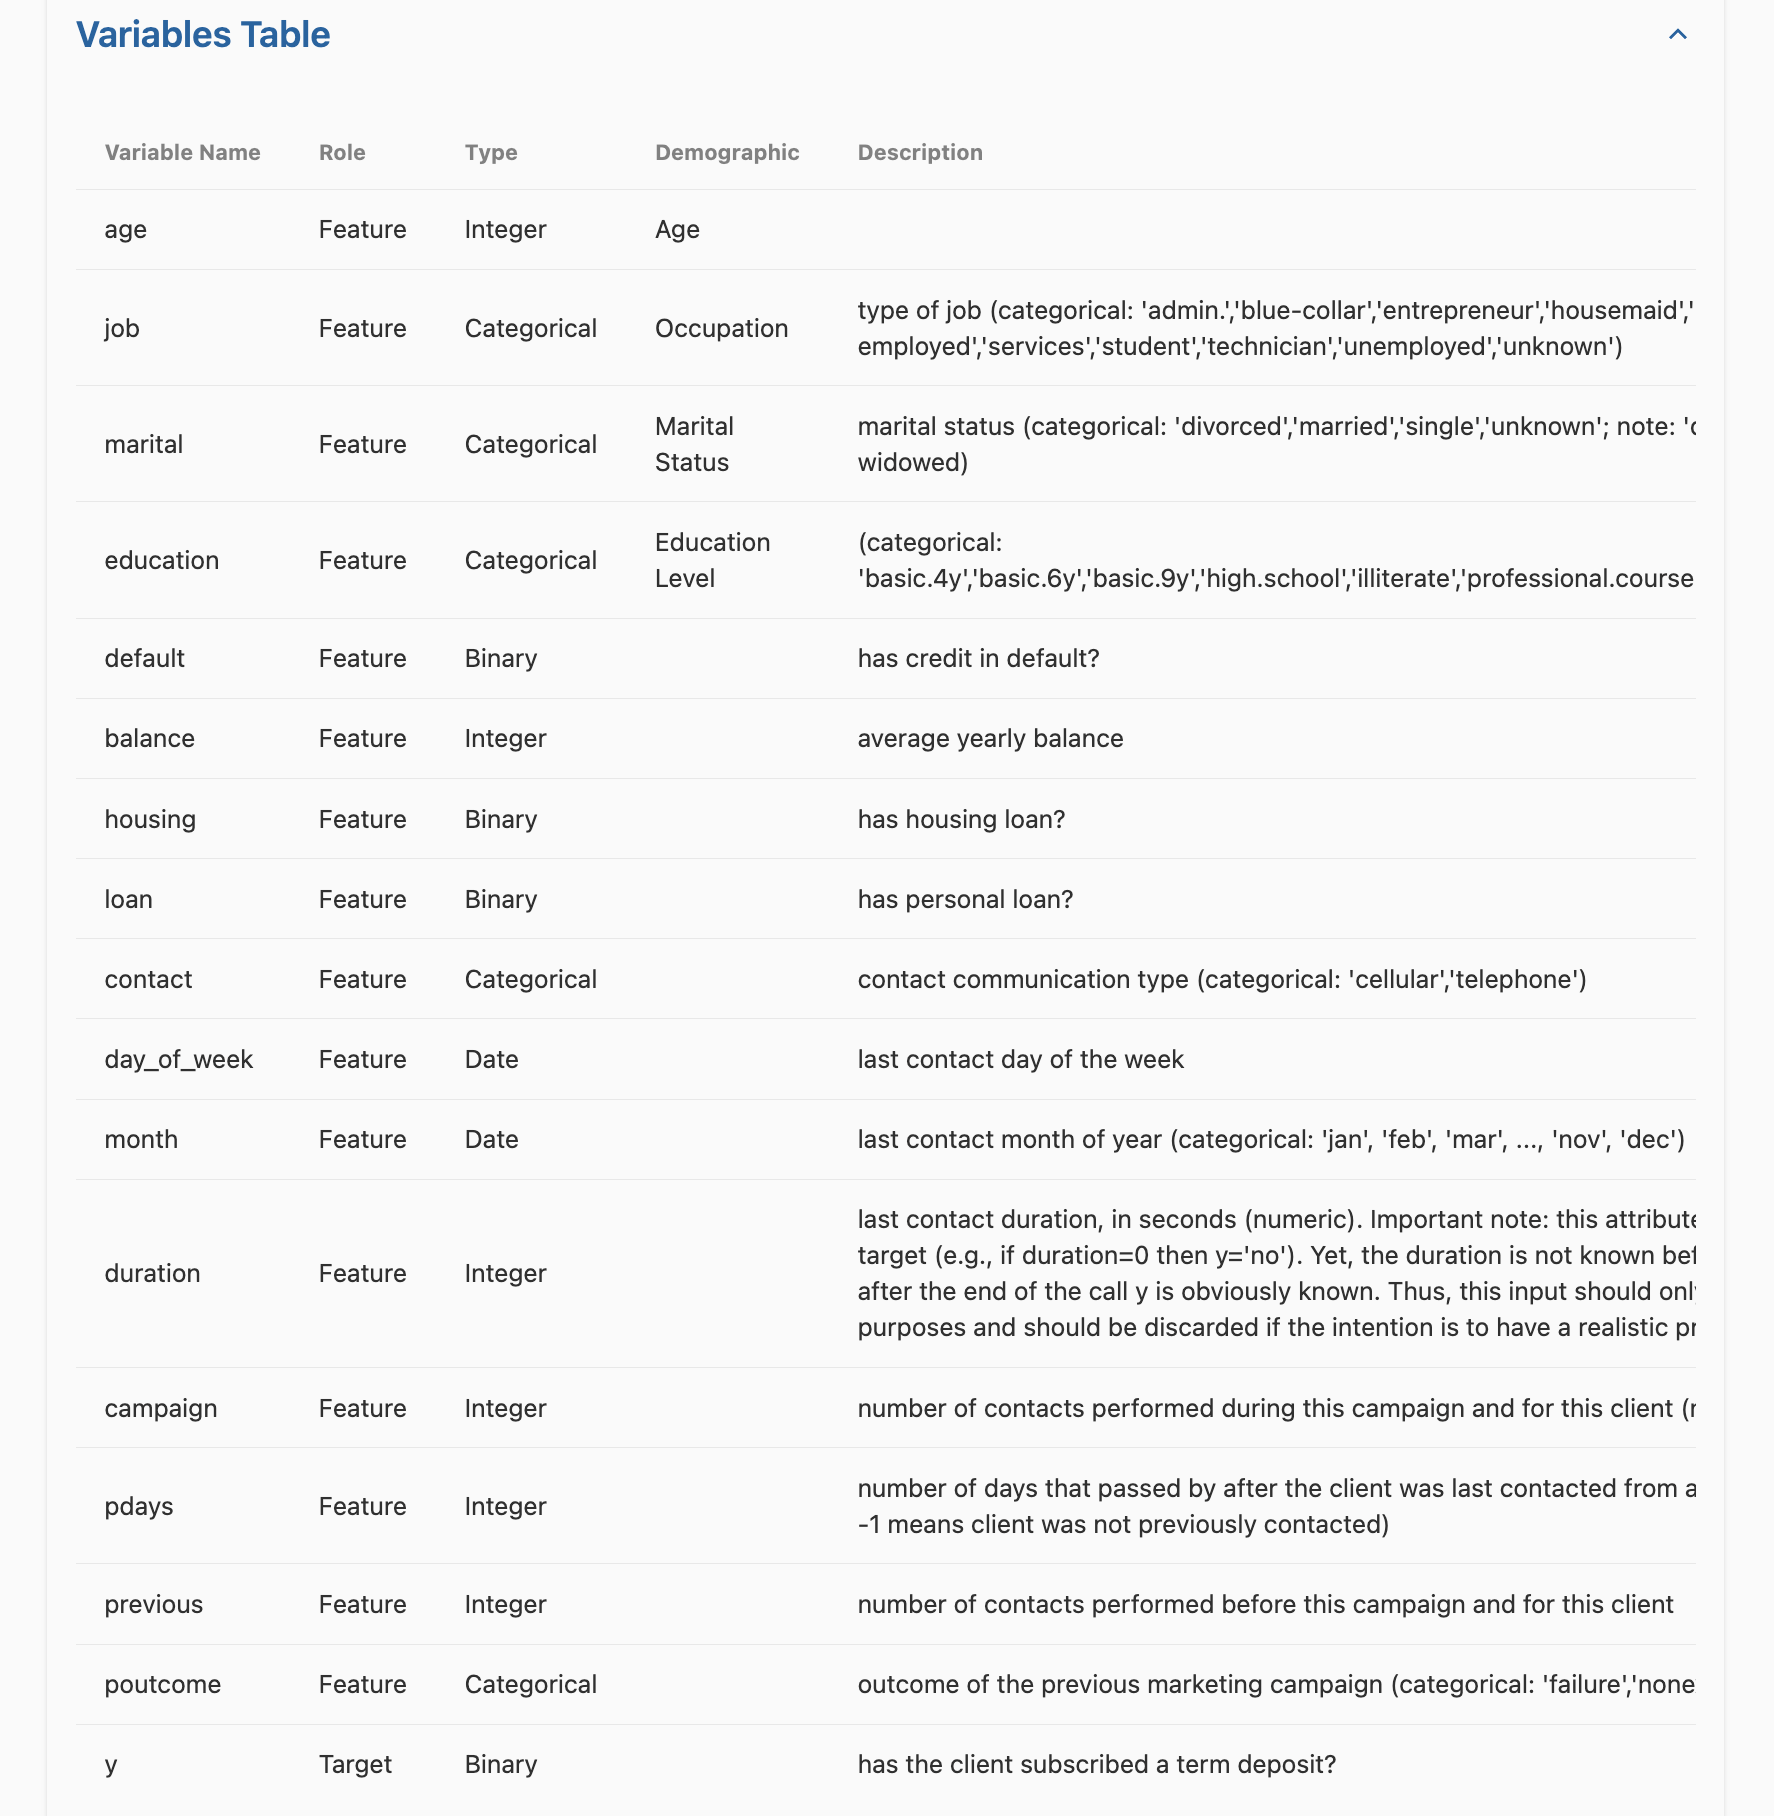

In [122]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

In [123]:
data = pd.read_csv('bank-additional-full.csv', delimiter=';')

# 1. Explore the Dataset:

In [124]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [125]:
data.shape

(41188, 21)

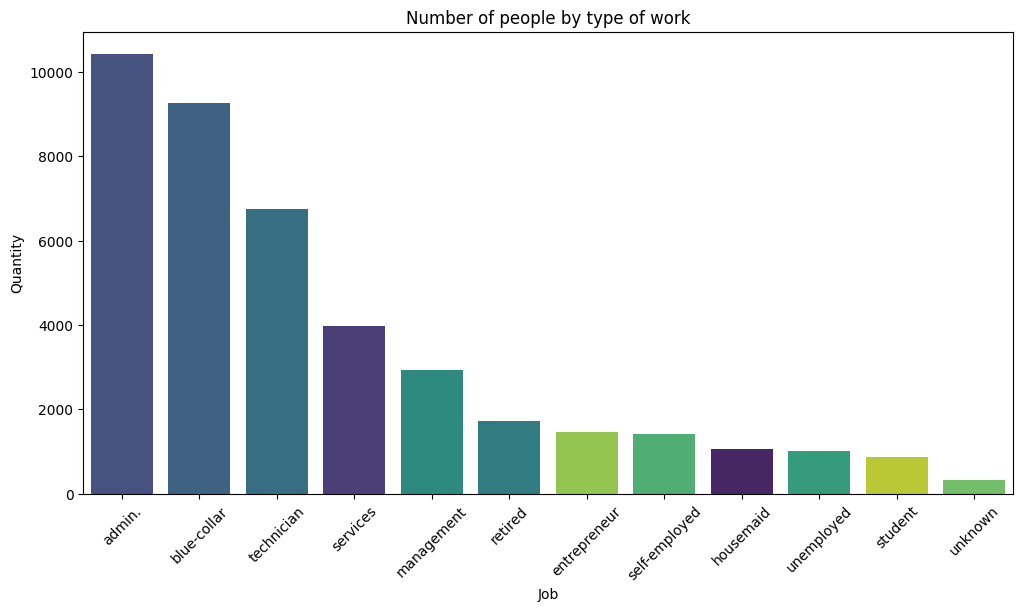

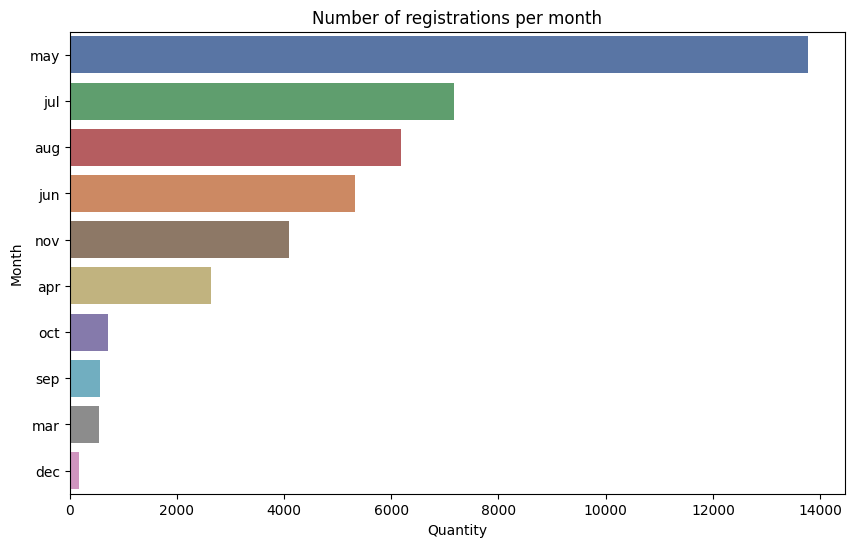

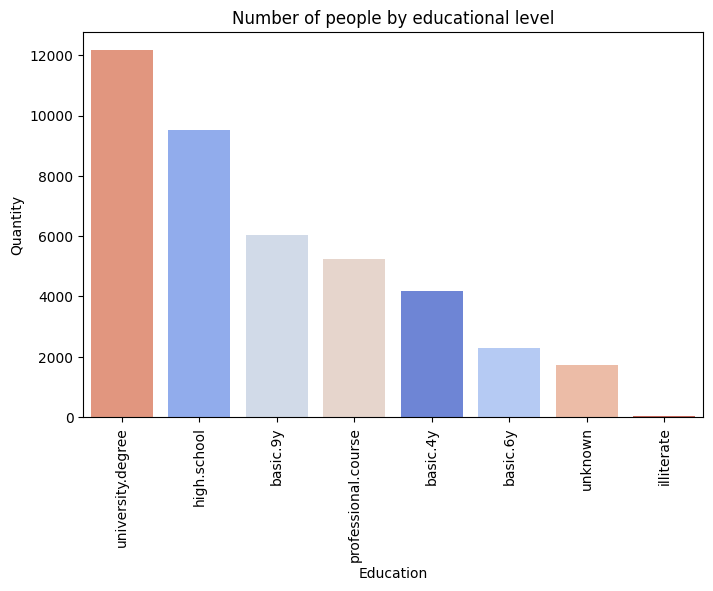

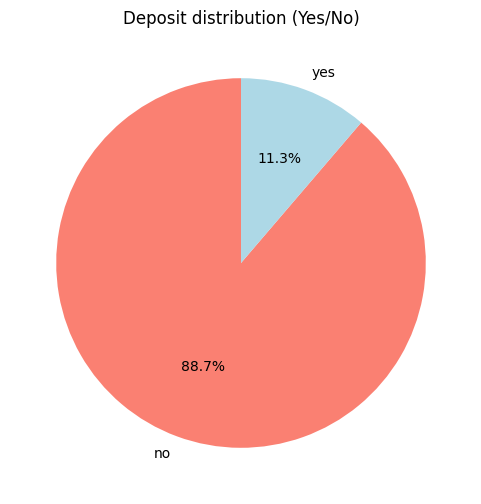

In [126]:
#Overall info for some categorical data

#Job column
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="job", hue="job", legend=False, palette="viridis", order=data["job"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of people by type of work")
plt.xlabel("Job")
plt.ylabel("Quantity")
plt.show()

#Month column
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y="month", hue="month", legend=False, palette="deep", order=data["month"].value_counts().index)
plt.title("Number of registrations per month")
plt.xlabel("Quantity")
plt.ylabel("Month")
plt.show()


#Education column
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="education", hue="education", legend=False, palette="coolwarm", order=data["education"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Number of people by educational level")
plt.xlabel("Education")
plt.ylabel("Quantity")
plt.show()

#Deposit column
plt.figure(figsize=(6, 6))
data["y"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["salmon", "lightblue"], startangle=90)
plt.title("Deposit distribution (Yes/No)")
plt.ylabel("")  # remove Y
plt.show()

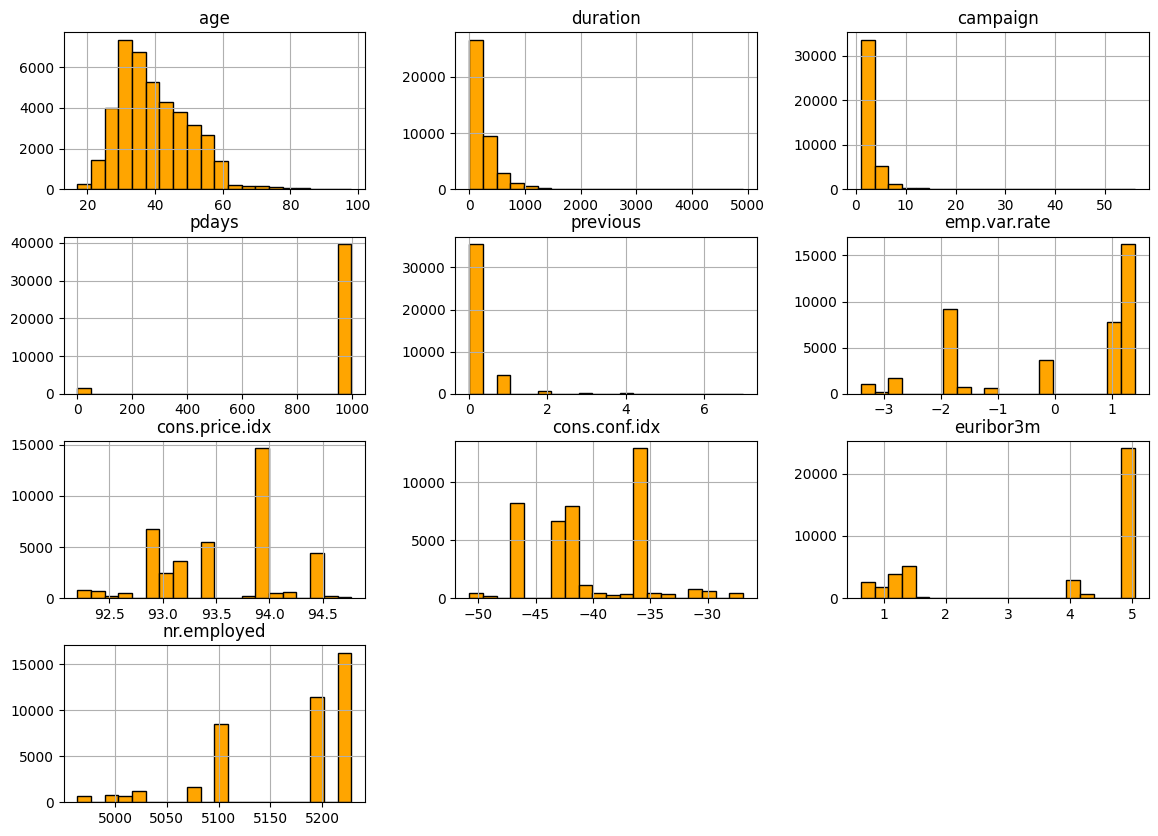

In [127]:
# Overall for numerical data
data.hist(figsize=(14, 10), bins=20, edgecolor='black', color='orange')
plt.show()

# 2. Handle Missing Data:

In [128]:
# Check for missing values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Observation : There is no missing value.

# 3. Handle Outliers :

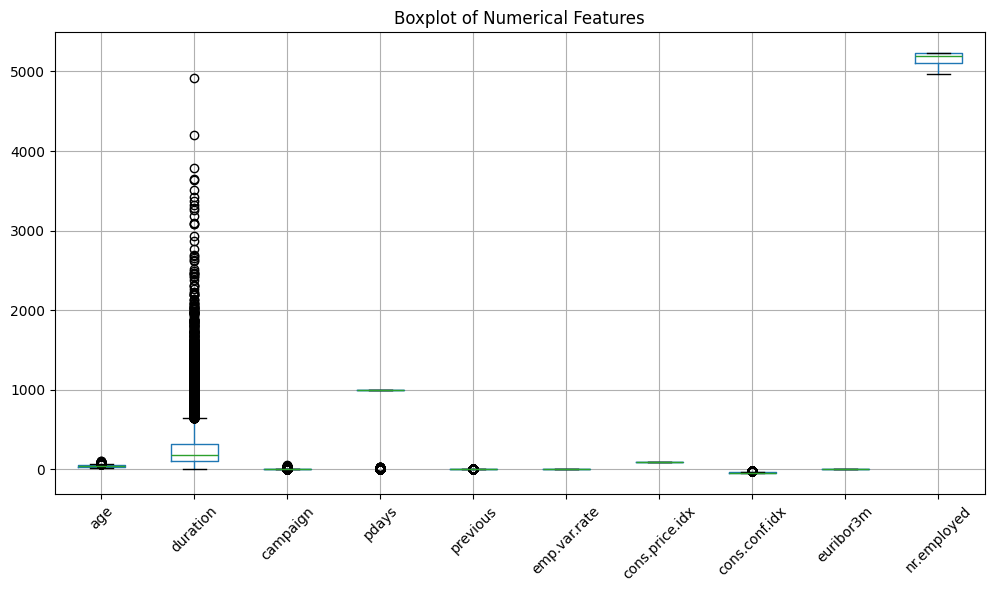

In [129]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for numerical features
plt.figure(figsize=(12, 6))
data[numerical_cols].boxplot(rot=45)  # Rotate labels for better readability
plt.title("Boxplot of Numerical Features")
plt.show()

## Observation : There are some outliers in duration, pdays, but since the research paper does not explicitly mention removing outliers in the data preprocessing steps and we are reproducing the paper's methodology so it is better to keep the outliers.

# 3. Encoding Categorical Features:

## 3-1. Convert 'yes'/'no' to 0/1 : 'y'.

In [130]:
# Define binary columns
binary_columns = ['y']

# Replace values: 'no' → 0, 'yes' → 1
data[binary_columns] = data[binary_columns].replace({'no': 0, 'yes': 1})

# Ensure correct data types
data[binary_columns] = data[binary_columns].infer_objects(copy=False)

C:\Users\elvis\AppData\Local\Temp\ipykernel_1296\2898404099.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[binary_columns] = data[binary_columns].replace({'no': 0, 'yes': 1})


In [131]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


## 3-2. LabelEncoding : 'job', 'marital', 'default', 'housing', 'loan', 'month', 'contact', 'day_of_week', 'poutcome'

In [132]:
# Identify object columns
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [133]:
# List the categorical columns to apply one-hot encoding to
categorical_columns = ['job', 'marital', 'default', 'housing', 'loan', 'month', 'contact', 'day_of_week', 'poutcome']

le = LabelEncoder()

for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,basic.4y,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,high.school,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,high.school,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,basic.6y,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,high.school,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


## 3-3. OrdinalEncoding : 'Education'

In [134]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [135]:
encoder = OrdinalEncoder(categories=[['university.degree','professional.course','high.school', 'basic.9y', 'basic.6y', 'basic.4y', 'illiterate', 'unknown']])

data['education'] = encoder.fit_transform(data[['education']])

# As the encoding its a float, I'll change it to int 
data['education'] = data['education'].astype(int)

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,2,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,2,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,4,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,2,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


# 4. Data Splitting :

In [136]:
X = data.drop('y', axis=1)
y = data['y']

In [137]:
# Split the data into training and testing sets (67% train, 33% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=46)

# 5. Feature Scaling :

## The research paper does not explicitly mention which scaling method they used, but StandardScaler is a good choice for this dataset because:
### ✅ Preserves Shape → Keeps the original distribution (except for mean and variance).
### ✅ Handles Normally Distributed Data Well → If the feature follows a normal distribution, it works best.
### ✅ Used in Many Machine Learning Models → Models like Logistic Regression, SVM, and KNN perform better with standardized data.

In [138]:
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [139]:
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [140]:
X_train.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.540077,1.738457,-1.932178,-1.076267,1.943374,0.941904,-0.452116,1.317357,-0.102339,0.713613,0.722451,0.153808,0.194612,-0.348400,0.191835,0.836370,1.532010,-0.282663,0.768877,0.841426
1,-0.863386,-0.762322,-0.290398,1.021606,1.943374,0.941904,-0.452116,-0.759096,0.760757,1.429665,0.118641,-0.205303,0.194612,-0.348400,0.191835,-1.204788,-1.184283,-1.235877,-1.326217,-0.943646
2,0.482553,0.904864,-0.290398,-0.027331,-0.513893,0.941904,-0.452116,1.317357,-0.102339,0.713613,-0.542857,1.590256,0.194612,-0.348400,0.191835,0.836370,1.532010,-0.282663,0.712847,0.841426
3,1.540077,0.349135,-0.290398,-0.027331,1.943374,-1.086411,-0.452116,1.317357,-0.102339,1.429665,-0.677465,-0.564415,0.194612,-0.348400,0.191835,0.836370,1.532010,-0.282663,0.769455,0.841426
4,1.732354,0.071271,-0.290398,-1.076267,-0.513893,0.941904,-0.452116,-0.759096,1.192305,-0.002439,-0.254413,-0.564415,0.194612,-0.348400,0.191835,-0.758285,2.053842,-2.232420,-1.495465,-2.818664
5,-1.055663,0.904864,-0.290398,0.497138,-0.513893,0.941904,-0.452116,1.317357,0.760757,1.429665,-0.635159,0.153808,0.194612,-0.348400,0.191835,0.645011,0.718159,0.887191,0.708803,0.328044
6,-0.190417,0.071271,-1.932178,-1.076267,-0.513893,-1.086411,-0.452116,-0.759096,-1.828531,-0.718491,1.353183,-0.564415,0.194612,1.679464,-2.571051,-1.204788,-0.869802,-1.430853,-1.285205,-0.943646
7,-0.190417,0.904864,-0.290398,-0.027331,1.943374,-1.086411,-0.452116,1.317357,0.760757,-1.434543,0.130179,1.231144,0.194612,-0.348400,0.191835,0.645011,0.718159,0.887191,0.712847,0.328044
8,-0.959525,0.904864,-0.290398,1.021606,-0.513893,0.941904,-0.452116,-0.759096,-0.533887,-0.718491,-0.500552,-0.205303,0.194612,-0.348400,0.191835,0.836370,0.586837,-0.477639,0.769455,0.841426
9,-0.478832,0.904864,1.351383,-0.027331,-0.513893,-1.086411,-0.452116,-0.759096,0.760757,-0.002439,0.349397,-0.564415,0.194612,-0.348400,0.191835,-1.204788,-1.184283,-1.235877,-1.365496,-0.943646


# Part 2. Steps reproduced from the paper :

# Logistic Regression

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [142]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [143]:
Y_lr_pred = lr.predict(X_test)

In [144]:
print(f'Accuracy of Logistic Regression: {lr.score(X_test, y_test): .2f}')

Accuracy of Logistic Regression:  0.91


In [145]:
conf_lr = confusion_matrix(y_test, Y_lr_pred)
conf_lr

array([[11765,   331],
       [  892,   605]])

In [146]:
target_names = ['no', 'yes']
print(classification_report(y_test, Y_lr_pred, target_names=target_names))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95     12096
         yes       0.65      0.40      0.50      1497

    accuracy                           0.91     13593
   macro avg       0.79      0.69      0.72     13593
weighted avg       0.90      0.91      0.90     13593



### The model performs well for the majority class ("no") but struggles with the minority class ("yes"), as shown by the low recall (40%). This suggests class imbalance, where many "no" instances are misclassified.

# Decision Tree

In [147]:
from sklearn.tree import DecisionTreeClassifier

In [148]:
dt_clr = DecisionTreeClassifier()
dt_clr.fit(X_train, y_train)

DecisionTreeClassifier()

In [149]:
Y_dt_pred = dt_clr.predict(X_test)
print(f'Accuracy of Decision Tree: {dt_clr.score(X_test, y_test): .2f}')

Accuracy of Decision Tree:  0.89


In [150]:
conf_dt = confusion_matrix(y_test, Y_dt_pred)
conf_dt

array([[11331,   765],
       [  746,   751]])

In [151]:
print(classification_report(y_test, Y_dt_pred, target_names=target_names))

              precision    recall  f1-score   support

          no       0.94      0.94      0.94     12096
         yes       0.50      0.50      0.50      1497

    accuracy                           0.89     13593
   macro avg       0.72      0.72      0.72     13593
weighted avg       0.89      0.89      0.89     13593



### The model performs well for predicting "yes" but struggles with "no" due to class imbalance. While accuracy is high (89%), the low precision (50%) and recall (53%) for "no" indicate many misclassifications. Improving class balance or adjusting thresholds could enhance minority class prediction.

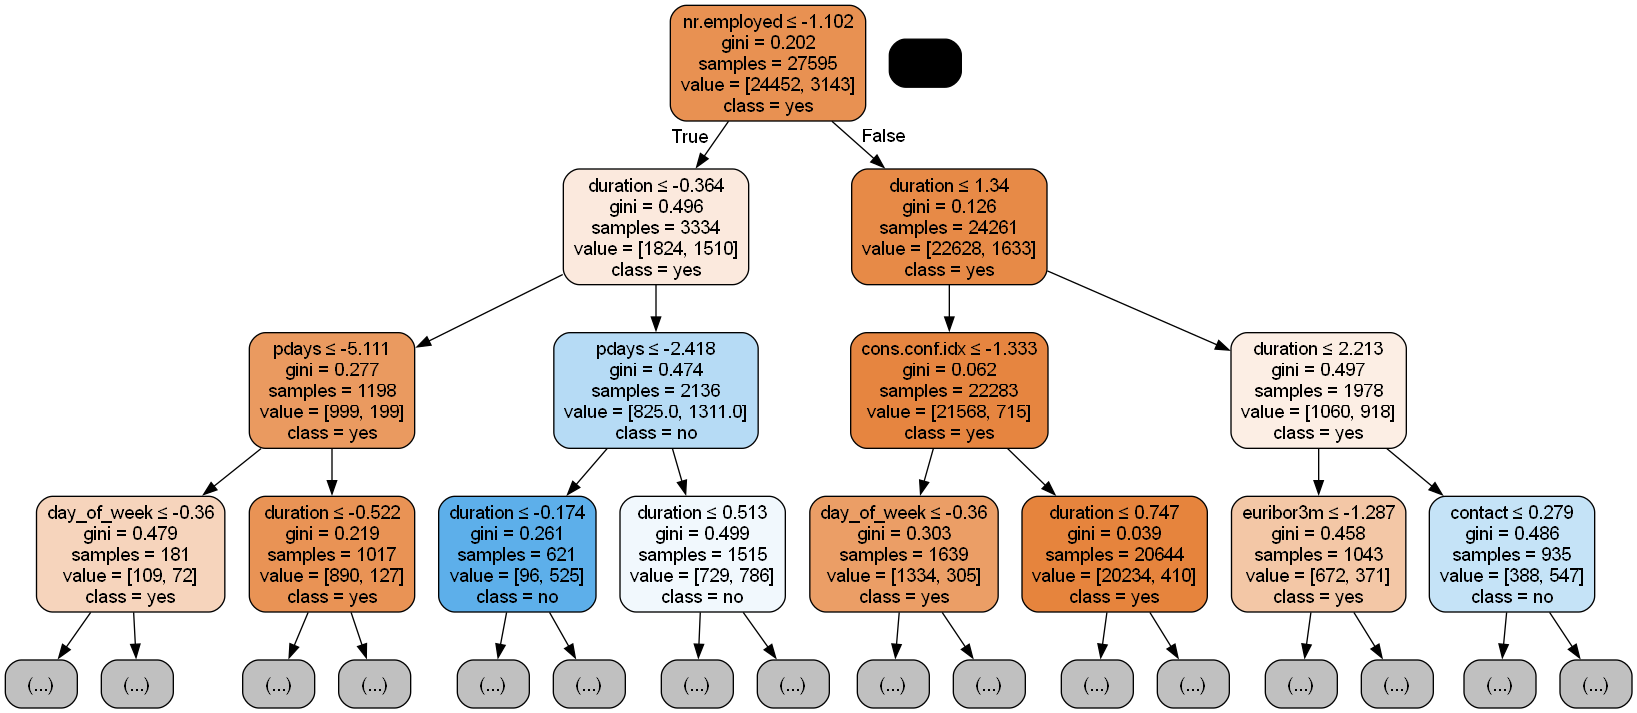

In [152]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(dt_clr, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['yes','no'], max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('bank_marketing.png')
Image(graph.create_png())

### The decision tree shows that **employment rate (`nr.employed`)** and **call duration (`duration`)** are the strongest predictors, where **low employment and short calls increase the likelihood of a "no" response**. **Economic factors like consumer confidence (`cons.conf.idx`) and interest rates (`euribor3m`) also play a role**, as **low confidence and low interest rates correlate with more refusals**. This suggests that **customers are more likely to accept a term deposit when economic conditions are stable and they engage in longer conversations**.

## 3. SVM

In [153]:
from sklearn.svm import SVC

In [154]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)

SVC(probability=True)

In [155]:
Y_svc_pred = svc.predict(X_test)

In [156]:
print(f'Accuracy of SVM: {svc.score(X_test, y_test): .2f}')

Accuracy of SVM:  0.91


In [157]:
print(classification_report(y_test, Y_svc_pred, target_names=target_names))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95     12096
         yes       0.65      0.38      0.48      1497

    accuracy                           0.91     13593
   macro avg       0.79      0.68      0.71     13593
weighted avg       0.90      0.91      0.90     13593



In [158]:
conf_svc = confusion_matrix(y_test, Y_svc_pred)
conf_svc

array([[11790,   306],
       [  929,   568]])

# Part 3. Contributions:

# 1. KNN :

In [159]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [160]:
error_rates = []
k_values = range(1, 31)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error)

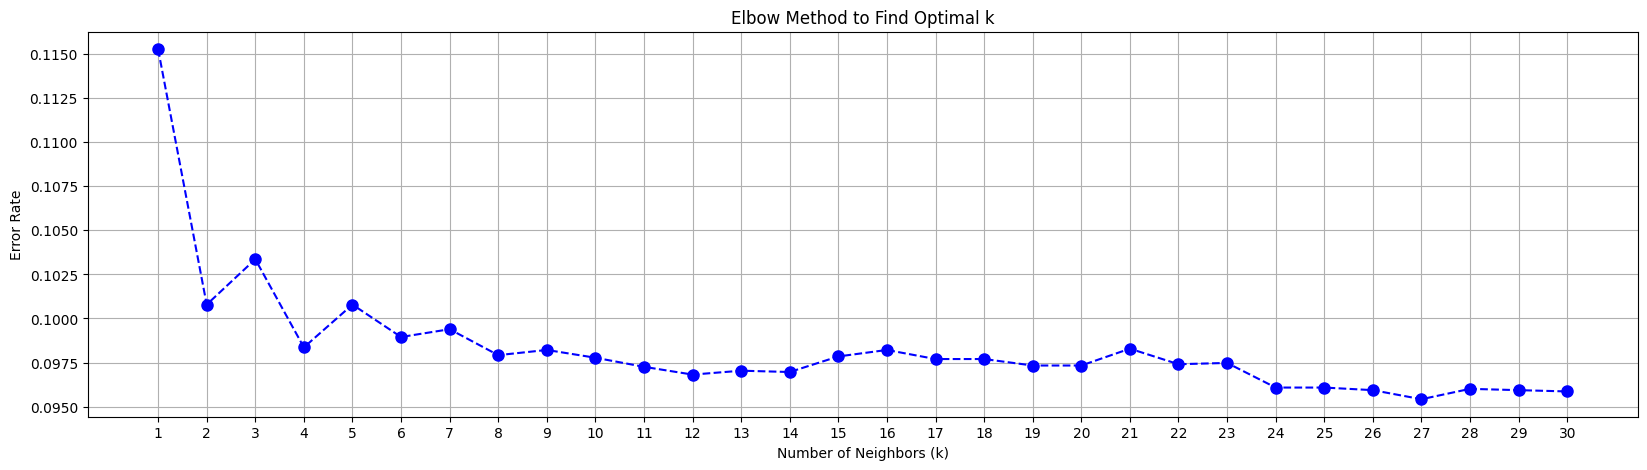

In [161]:
plt.figure(figsize=(20, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='b', markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k')
plt.xticks(np.arange(1, 31))
plt.grid(True)
plt.show()

In [162]:
from sklearn.model_selection import cross_val_score
from statistics import mean

In [163]:
knn_12 = KNeighborsClassifier(n_neighbors=12)
score_k_12 = cross_val_score(knn_12, X_train, y_train, cv=5)
avg_score_k_12 = mean(score_k_12)
print(f"Average score for 12 neighbors: {avg_score_k_12}")

Average score for 12 neighbors: 0.9033882949809748


In [164]:
knn_12.fit(X_train, y_train)
Y_knn_pred = knn_12.predict(X_test)

In [165]:
print(f'Accuracy of KNN: {knn_12.score(X_test, y_test): .2f}')

Accuracy of KNN:  0.90


In [166]:
from sklearn.metrics import confusion_matrix, classification_report

In [167]:
target_names = ['No', 'Yes']

In [168]:
print(classification_report(y_test, Y_knn_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.92      0.98      0.95     12096
         Yes       0.62      0.31      0.42      1497

    accuracy                           0.90     13593
   macro avg       0.77      0.64      0.68     13593
weighted avg       0.89      0.90      0.89     13593



In [169]:
conf_knn = confusion_matrix(y_test, Y_knn_pred)
conf_knn

array([[11809,   287],
       [ 1029,   468]])

## Observation : Accuracy of KNN is 0.90.

# 2. Random Forest :

In [170]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [172]:
Y_rf_pred = rf.predict(X_test)

In [173]:
print(f'Accuracy of Random Forest: {rf.score(X_test, y_test): .2f}')

Accuracy of Random Forest:  0.91


In [174]:
print(classification_report(y_test, Y_rf_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.94      0.96      0.95     12096
         Yes       0.64      0.52      0.57      1497

    accuracy                           0.91     13593
   macro avg       0.79      0.74      0.76     13593
weighted avg       0.91      0.91      0.91     13593



In [175]:
conf_rf = confusion_matrix(y_test, Y_rf_pred)
conf_rf

array([[11665,   431],
       [  725,   772]])

## Observation : Accuracy of Random Forest is 0.91.

# 3. XGBoost

In [177]:
import xgboost as xgb

In [178]:
xg_train = xgb.DMatrix(X_train, y_train)
xg_test = xgb.DMatrix(X_test, y_test)

In [179]:
xgb_clf = xgb.XGBClassifier(eval_metric='auc') #auc is used for classification
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [180]:
Y_xgb_pred = xgb_clf.predict(X_test)
Y_xgb_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(13593,))

In [181]:
print(f'Accuracy of XGBoost: {xgb_clf.score(X_test, y_test): .2f}')

Accuracy of XGBoost:  0.91


In [182]:
print(classification_report(y_test, Y_xgb_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.94      0.96      0.95     12096
         Yes       0.62      0.55      0.58      1497

    accuracy                           0.91     13593
   macro avg       0.78      0.75      0.77     13593
weighted avg       0.91      0.91      0.91     13593



In [183]:
print(confusion_matrix(y_test, Y_xgb_pred))

[[11588   508]
 [  680   817]]


# AUC-ROC Curve

In [184]:
from sklearn.metrics import roc_curve, auc

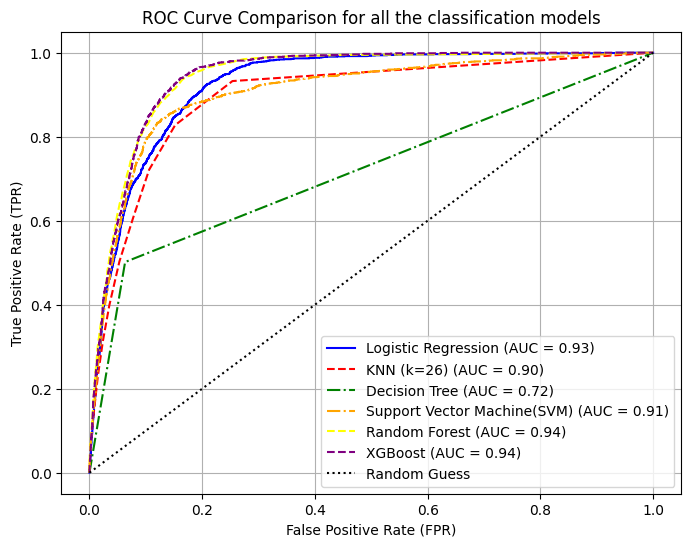

In [185]:
Y_lr_probs = lr.predict_proba(X_test)[:, 1]
Y_knn_12_probs = knn_12.predict_proba(X_test)[:, 1]
Y_dt_probs = dt_clr.predict_proba(X_test)[:, 1]
Y_svm_probs = svc.predict_proba(X_test)[:, 1]
Y_rf_probs = rf.predict_proba(X_test)[:, 1]
Y_xgb_pred_probs = xgb_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for all the models
fpr_lr, tpr_lr, _ = roc_curve(y_test, Y_lr_probs)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_knn, tpr_knn, _ = roc_curve(y_test, Y_knn_12_probs)
auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_test, Y_dt_probs)
auc_dt = auc(fpr_dt, tpr_dt)

fpr_svm, tpr_svm, _ = roc_curve(y_test, Y_svm_probs)
auc_svm = auc(fpr_svm, tpr_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, Y_rf_probs)
auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, Y_xgb_pred_probs)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', linestyle='dashed', label=f'KNN (k=26) (AUC = {auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', linestyle='dashdot', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_svm, tpr_svm, color='orange', linestyle='dashdot', label=f'Support Vector Machine(SVM) (AUC = {auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='yellow', linestyle='dashed', label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='purple', linestyle='dashed', label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison for all the classification models")
plt.legend()
plt.grid(True)
plt.show()

# Part. 4 Optimize : SMOTE

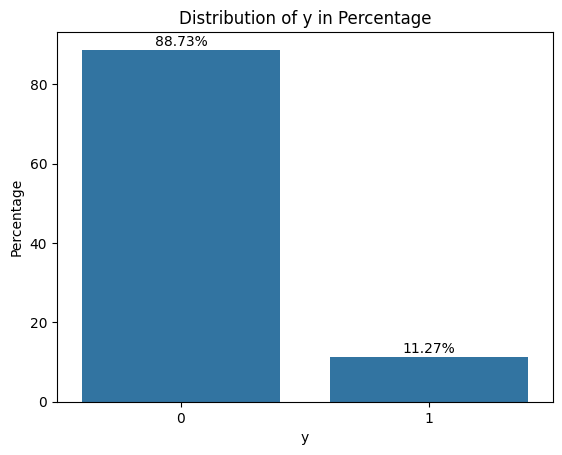

In [186]:
counts = data.y.value_counts()
total = counts.sum()
graf = sns.barplot(x=counts.index, y=counts.values / total * 100)
for i, v in enumerate(counts.values):
    plt.text(i, (v / total * 100) + 1, f"{(v / total * 100):.2f}%", ha='center')
plt.ylabel("Percentage")
plt.xlabel("y")
plt.title("Distribution of y in Percentage")
plt.show()

In [187]:
from imblearn.over_sampling import SMOTE

In [188]:
y.value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [189]:
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X, y)

In [190]:
X.shape

(41188, 20)

In [191]:
y.value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [192]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,5,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,2,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,2,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,4,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,2,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [193]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

In [194]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 1. Logistic Regression

In [195]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [196]:
Y_lr_pred = lr.predict(X_test)

In [197]:
print(f'Accuracy of Logistic Regression: {lr.score(X_test, y_test): .2f}')

Accuracy of Logistic Regression:  0.89


In [198]:
conf_lr = confusion_matrix(y_test, Y_lr_pred)
conf_lr

array([[10632,  1456],
       [ 1274, 10760]])

In [199]:
print(classification_report(y_test, Y_lr_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.89      0.88      0.89     12088
         Yes       0.88      0.89      0.89     12034

    accuracy                           0.89     24122
   macro avg       0.89      0.89      0.89     24122
weighted avg       0.89      0.89      0.89     24122



## 2. Decision Tree

In [200]:
dt_clr = DecisionTreeClassifier()
dt_clr.fit(X_train, y_train)

DecisionTreeClassifier()

In [201]:
Y_dt_pred = dt_clr.predict(X_test)
print(f'Accuracy of Decision Tree: {dt_clr.score(X_test, y_test): .2f}')

Accuracy of Decision Tree:  0.93


In [202]:
conf_dt = confusion_matrix(y_test, Y_dt_pred)
conf_dt

array([[11108,   980],
       [  796, 11238]])

In [203]:
print(classification_report(y_test, Y_dt_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.93      0.92      0.93     12088
         Yes       0.92      0.93      0.93     12034

    accuracy                           0.93     24122
   macro avg       0.93      0.93      0.93     24122
weighted avg       0.93      0.93      0.93     24122



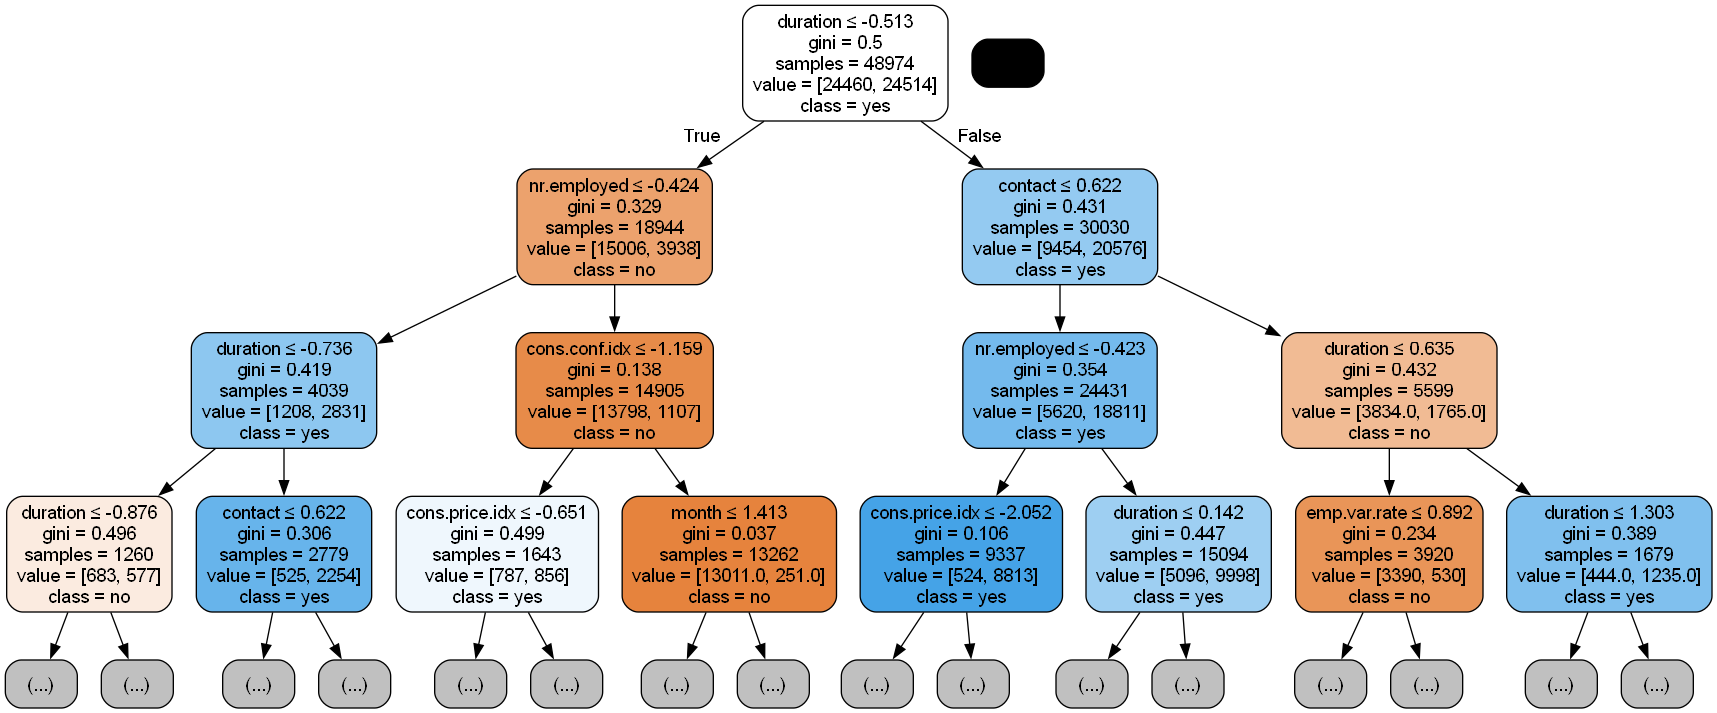

In [204]:
dot_data = StringIO()
export_graphviz(dt_clr, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['no','yes'], max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('bank_marketing_SMOTE.png')
Image(graph.create_png())

#### After applying SMOTE, the Decision Tree structure changed notably. Previously, the model was more influenced by features like "duration" in the initial splits, but after balancing the dataset, "nr.employed" became the primary decision criterion. This suggests that before SMOTE, the tree was biased towards the majority class, relying heavily on specific features that dominated the dataset. Now, with a more balanced distribution, the model is considering a broader set of features when making predictions

# 3. SVM

In [205]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)

SVC(probability=True)

In [206]:
Y_svc_pred = svc.predict(X_test)

In [207]:
print(classification_report(y_test, Y_svc_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.94      0.90      0.92     12088
         Yes       0.90      0.95      0.92     12034

    accuracy                           0.92     24122
   macro avg       0.92      0.92      0.92     24122
weighted avg       0.92      0.92      0.92     24122



In [208]:
conf_svc = confusion_matrix(y_test, Y_svc_pred)
conf_svc

array([[10853,  1235],
       [  647, 11387]])

## 4. KNN

In [209]:
error_rates = []
k_values = range(1, 31)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    Y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, Y_pred)
    error_rates.append(error)

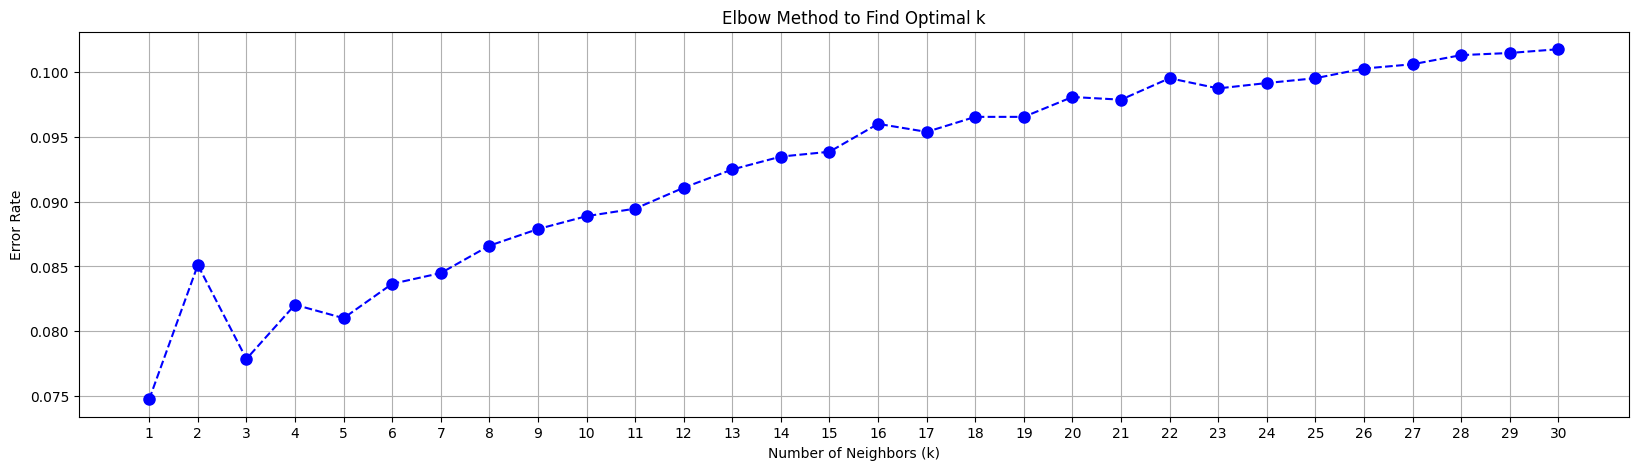

In [210]:
plt.figure(figsize=(20, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='b', markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k')
plt.xticks(np.arange(1, 31))
plt.grid(True)
plt.show()

In [211]:
knn_1 = KNeighborsClassifier(n_neighbors=1)

score_k_1 = cross_val_score(knn_1, X_train, y_train, cv=5)

avg_score_k_1 = mean(score_k_1)

print(f"Average score for 1 neighbors: {avg_score_k_1}")

Average score for 1 neighbors: 0.9202638299974889


In [212]:
knn_1.fit(X_train, y_train)
Y_knn_pred = knn_1.predict(X_test)

In [213]:
print(f'Accuracy of KNN: {knn_1.score(X_test, y_test): .2f}')

Accuracy of KNN:  0.93


In [214]:
print(classification_report(y_test, Y_knn_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.94      0.91      0.92     12088
         Yes       0.91      0.94      0.93     12034

    accuracy                           0.93     24122
   macro avg       0.93      0.93      0.93     24122
weighted avg       0.93      0.93      0.93     24122



In [215]:
conf_knn = confusion_matrix(y_test, Y_knn_pred)
conf_knn

array([[10965,  1123],
       [  680, 11354]])

## 5. Random Forest

In [216]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [217]:
Y_rf_pred = rf.predict(X_test)

In [218]:
print(f'Accuracy of Random Forest: {rf.score(X_test, y_test): .2f}')

Accuracy of Random Forest:  0.95


In [219]:
print(classification_report(y_test, Y_rf_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.96      0.93      0.95     12088
         Yes       0.93      0.97      0.95     12034

    accuracy                           0.95     24122
   macro avg       0.95      0.95      0.95     24122
weighted avg       0.95      0.95      0.95     24122



In [220]:
conf_rf = confusion_matrix(y_test, Y_rf_pred)
conf_rf

array([[11280,   808],
       [  413, 11621]])

## 6. XGBoost

In [221]:
xg_train = xgb.DMatrix(X_train, y_train)
xg_test = xgb.DMatrix(X_test, y_test)

In [222]:
xgb_clf = xgb.XGBClassifier(eval_metric='auc') #auc is used for classification
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [223]:
Y_xgb_pred = xgb_clf.predict(X_test)

In [224]:
print(f'Accuracy of XGBoost: {xgb_clf.score(X_test, y_test): .2f}')

Accuracy of XGBoost:  0.95


In [225]:
print(classification_report(y_test, Y_xgb_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.96      0.93      0.95     12088
         Yes       0.94      0.96      0.95     12034

    accuracy                           0.95     24122
   macro avg       0.95      0.95      0.95     24122
weighted avg       0.95      0.95      0.95     24122



In [226]:
print(confusion_matrix(y_test, Y_xgb_pred))

[[11298   790]
 [  509 11525]]


# AUC-ROC curve after SMOTE

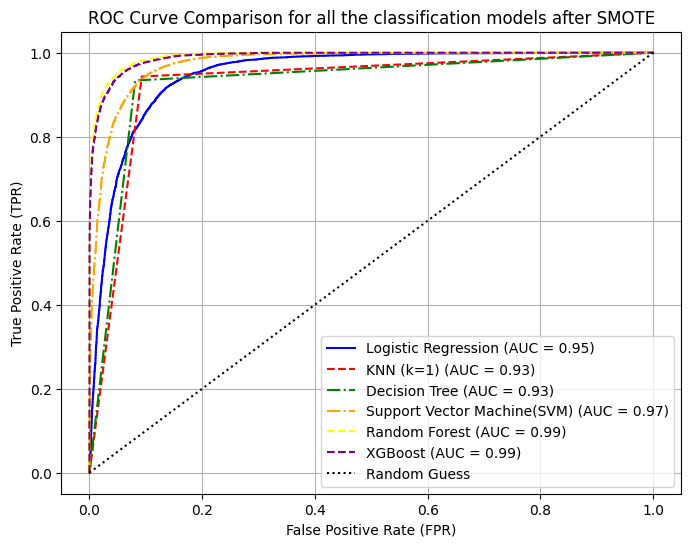

In [227]:
Y_lr_probs = lr.predict_proba(X_test)[:, 1]
Y_knn_1_probs = knn_1.predict_proba(X_test)[:, 1]
Y_dt_probs = dt_clr.predict_proba(X_test)[:, 1]
Y_svm_probs = svc.predict_proba(X_test)[:, 1]
Y_rf_probs = rf.predict_proba(X_test)[:, 1]
Y_xgb_pred_probs = xgb_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for all the models
fpr_lr, tpr_lr, _ = roc_curve(y_test, Y_lr_probs)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_knn, tpr_knn, _ = roc_curve(y_test, Y_knn_1_probs)
auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_test, Y_dt_probs)
auc_dt = auc(fpr_dt, tpr_dt)

fpr_svm, tpr_svm, _ = roc_curve(y_test, Y_svm_probs)
auc_svm = auc(fpr_svm, tpr_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, Y_rf_probs)
auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, Y_xgb_pred_probs)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', linestyle='dashed', label=f'KNN (k=1) (AUC = {auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', linestyle='dashdot', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_svm, tpr_svm, color='orange', linestyle='dashdot', label=f'Support Vector Machine(SVM) (AUC = {auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='yellow', linestyle='dashed', label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='purple', linestyle='dashed', label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison for all the classification models after SMOTE")
plt.legend()
plt.grid(True)
plt.show()